In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from ml.data import create_lineal_data
from ml.visualization import decision_boundary

%matplotlib inline

# Función de coste y gradiente

## Generación de datos

### Entrenamiento

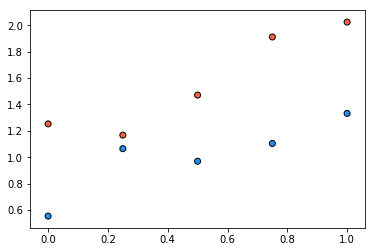

In [2]:
np.random.seed(0)  # Para hacer más determinística la generación de datos

samples_per_class = 5

Xa = np.c_[create_lineal_data(0.75, 0.9, spread=0.2, data_size=samples_per_class)]
Xb = np.c_[create_lineal_data(0.5, 0.75, spread=0.2, data_size=samples_per_class)]
X_train = np.r_[Xa, Xb]
y_train = np.r_[np.zeros(samples_per_class), np.ones(samples_per_class)]

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_dots, edgecolors='k')
plt.show()

### Validación

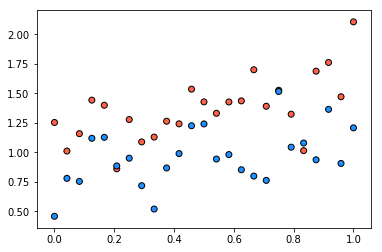

In [3]:
np.random.seed(0)  # Para hacer más determinística la generación de datos

samples_per_class = 25

Xa = np.c_[create_lineal_data(0.75, 0.9, spread=0.2, data_size=samples_per_class)]
Xb = np.c_[create_lineal_data(0.5, 0.75, spread=0.2, data_size=samples_per_class)]
X_val = np.r_[Xa, Xb]
y_val = np.r_[np.zeros(samples_per_class), np.ones(samples_per_class)]

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])

plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cmap_dots, edgecolors='k')
plt.show()

## Regresión Logística

### Función de coste y gradiente

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logloss(w, x, y):
    m = y.shape[0]
    y_hat = sigmoid(x.dot(w))
    cost1 = np.log(y_hat).dot(y)
    cost2 = np.log(1 - y_hat).dot(1 - y)
    J = -(cost1 + cost2)

    return J

def logloss_gradient(w, x, y):
    m = y.shape[0]
    y_hat = sigmoid(x.dot(w))
    gradient = np.dot(x.T, y_hat - y)
    
    return gradient

### Algoritmo de optimización (descenso por la gradiente)

In [5]:
def gradient_descent(w, x_train, y_train, x_val, y_va, cost_function,
                     cost_function_gradient, alpha=0.01, max_iter=1000):
    train_costs = np.zeros(max_iter)
    val_costs = np.zeros(max_iter)

    for iteration in range(max_iter):
        train_costs[iteration] = cost_function(w, x_train, y_train)
        val_costs[iteration] = cost_function(w, x_val, y_val)
        gradient = cost_function_gradient(w, x_train, y_train)
        w = w - alpha * gradient
    
    return w, train_costs, val_costs

In [6]:
# Agregar el vector de bias a los ejemplos (bias trick)
X_b_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_b_val = np.c_[np.ones(X_val.shape[0]), X_val]

w0 = np.zeros(X_b_train.shape[1])  # Initial weights

w, train_costs, val_costs = gradient_descent(w0, X_b_train, y_train, X_b_val, y_val,
                                             logloss, logloss_gradient, max_iter=20000)

### Exactitud (entrenamiento vs validación)

In [7]:
y_pred = (X_b_train.dot(w) >= 0.5).astype(np.int)  # Obtenemos las predicciones (como 0 o 1)
accuracy = (y_train == y_pred).astype(np.int).sum() / y_train.shape[0]  # Calcular la exactitud

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy)

y_pred = (X_b_val.dot(w) >= 0.5).astype(np.int)  # Obtenemos las predicciones (como 0 o 1)
accuracy = (y_val == y_pred).astype(np.int).sum() / y_val.shape[0]  # Calcular la exactitud

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy)

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.78


### Curva de aprendizaje (entrenamiento vs validación)

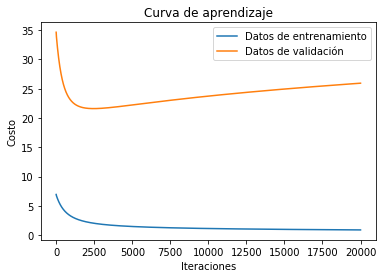

In [8]:
plt.plot(train_costs, label="Datos de entrenamiento")
plt.plot(val_costs, label="Datos de validación")
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.title("Curva de aprendizaje")
plt.legend()
plt.show()

### Frontera de decisión

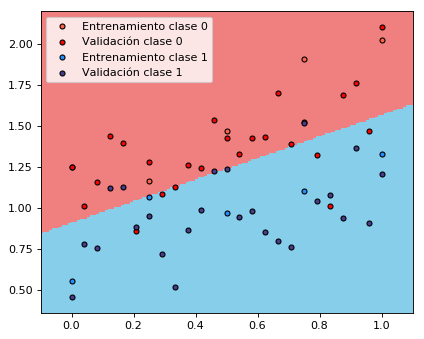

In [9]:
xx, yy, Z = decision_boundary(np.r_[X_train, X_val], w)

cmap_back = ListedColormap(['lightcoral', 'skyblue'])
cmap_dots = ['tomato', 'dodgerblue', 'red', 'darkslateblue']

plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)

for i in (0, 1):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], 
                color=cmap_dots[i], label='Entrenamiento clase %d' % i,
                edgecolor='k', s=20)
    plt.scatter(X_val[y_val==i, 0], X_val[y_val==i, 1],
                color=cmap_dots[i+2], label='Validación clase %d' % i,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()
plt.show()